# Problem Statement:-


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# there are 32560 rows and 15 columns

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# there are no null values present.

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
# the columns 'Age','Fnwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week' are intergers datatypes.
# rest of thee columns have object datatypes.

In [11]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
for c in df.columns:
    print(df[c].value_counts())
    print('\n********************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

********************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

********************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

********************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th

In [13]:
# we can observe that some of the columns have '?' in them.

In [14]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [15]:
# columns 'Workclass', 'Occupation' and 'Native_country' have '?' in them. Let's deal with it.

In [16]:
df=df.replace(' ?',np.NaN)

In [17]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

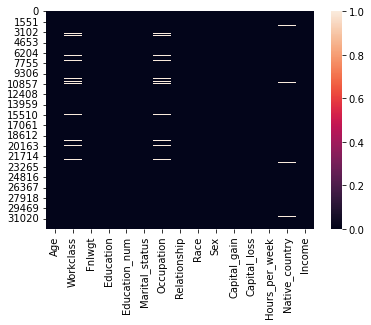

In [18]:
sns.heatmap(df.isna())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
# all three columns have object datatypes.

In [21]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
# there aree no null values present.

In [24]:
for c in df.columns:
    print(df[c].value_counts())
    print('\n********************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

********************
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

********************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

********************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool  

In [25]:
df.duplicated().sum()

24

In [26]:
# There are 24 duplicatted values present. Let's get rid of them.

In [27]:
df=df.drop_duplicates()

In [28]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
df.duplicated().sum()

0

In [30]:
# there are no duplicated values present now.

In [31]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
cc=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cc.append(i)
print('Categorical columns',cc)
print('\n')


nc=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        nc.append(i)
print('Numerical columns',nc)

Categorical columns ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical columns ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [33]:
cc

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [34]:
nc

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

# Data Visualisation

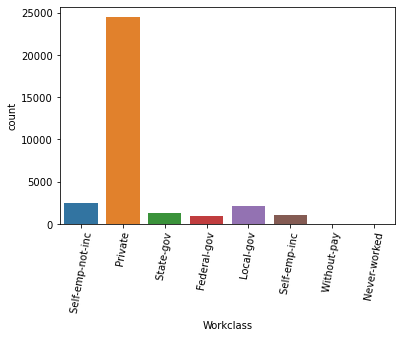

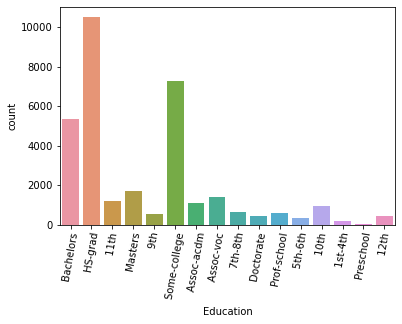

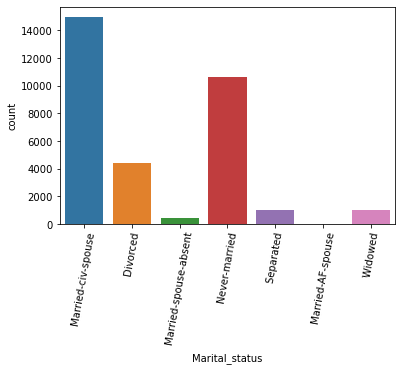

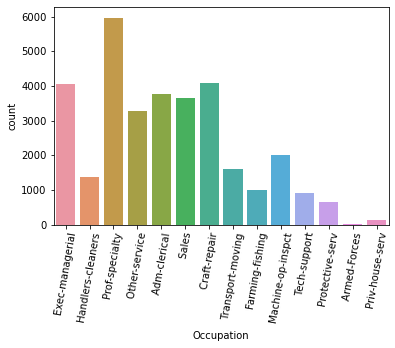

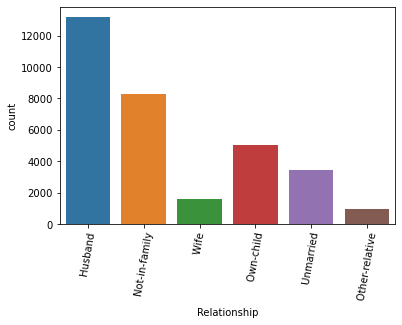

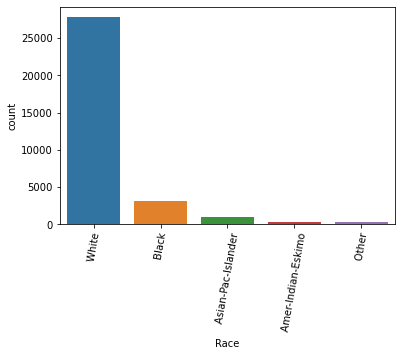

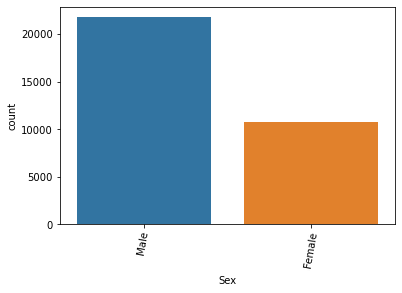

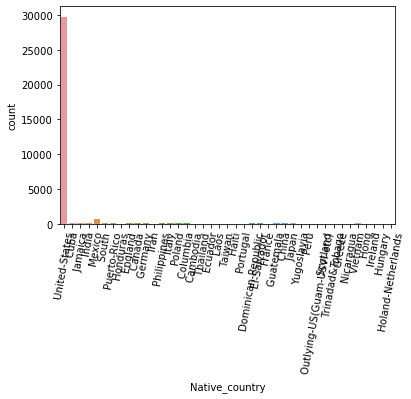

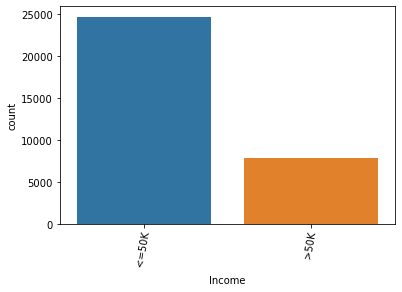

In [35]:
for a in df[cc]:
    sns.countplot(df[a])
    plt.xticks(rotation=80)
    plt.show()

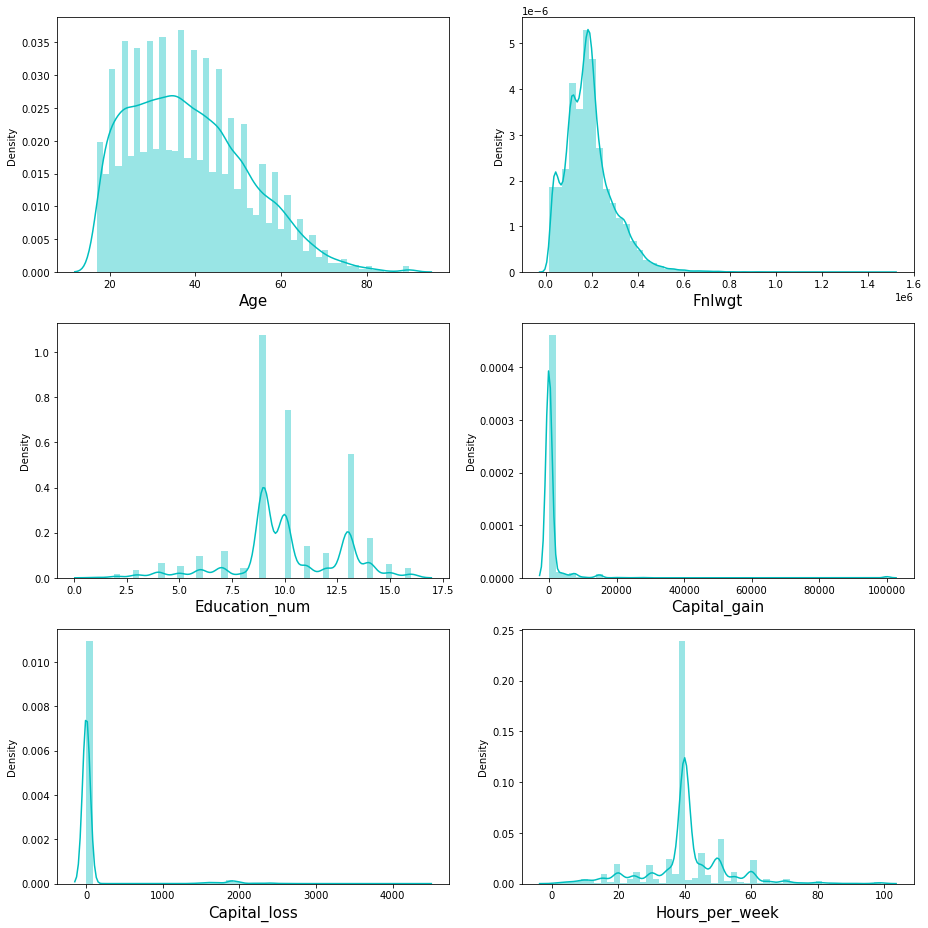

In [36]:
plt.figure(figsize=(13,13))
pltn=1
for col in nc:
    if pltn<=6:
        ax=plt.subplot(3,2,pltn)
        sns.distplot(df[col],color='c')
        plt.xlabel(col,fontsize=15)
    pltn+=1
plt.tight_layout()

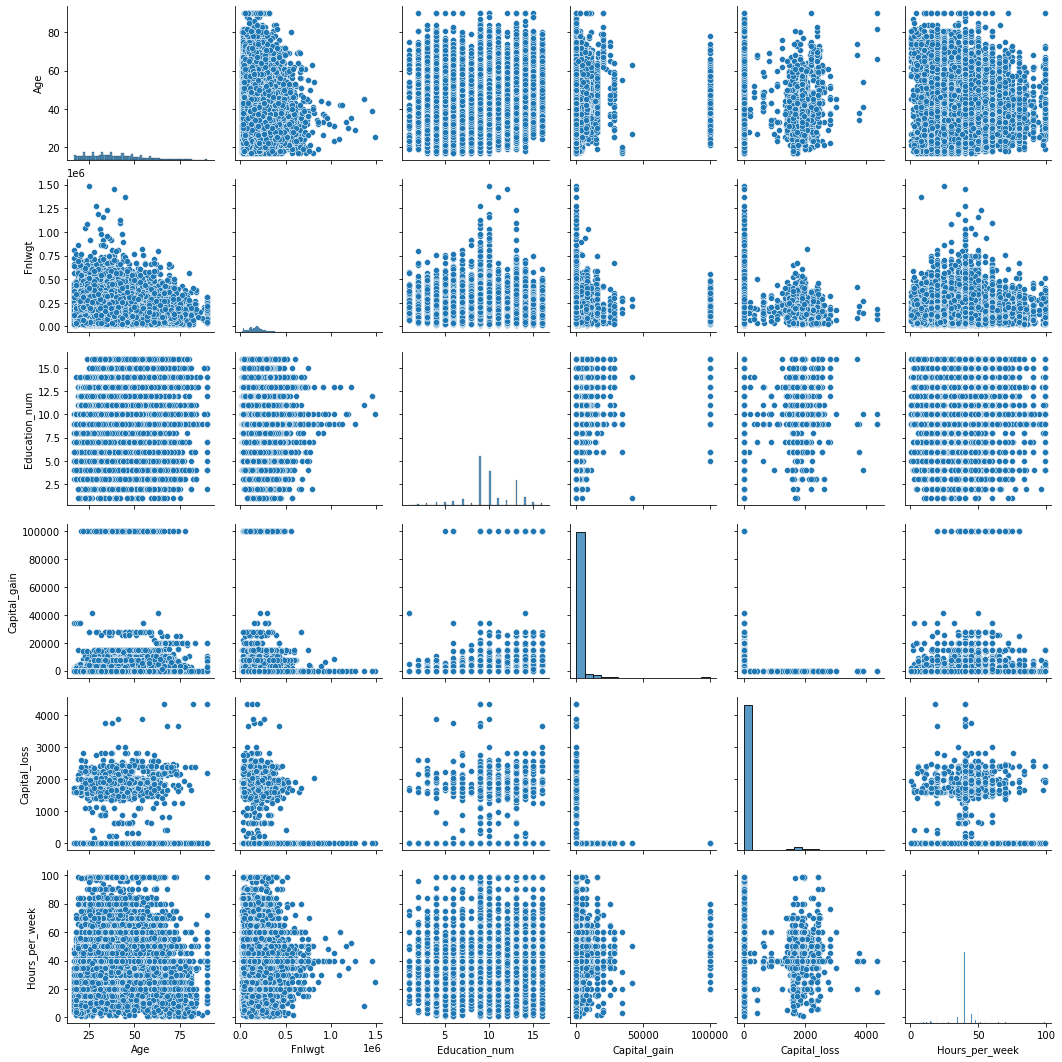

In [37]:
sns.pairplot(df)
plt.show()


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


In [39]:
# let's first encode the data.

In [40]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Income']= le.fit_transform(df['Income'])


In [42]:
df['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

In [43]:
# the target variable has been successfully encoded.
# now let's encode the feeatures.

In [44]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']])

OrdinalEncoder()

In [45]:
df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]=oe.transform(df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  int64  
 1   Workclass       32536 non-null  float64
 2   Fnlwgt          32536 non-null  int64  
 3   Education       32536 non-null  float64
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  float64
 6   Occupation      32536 non-null  float64
 7   Relationship    32536 non-null  float64
 8   Race            32536 non-null  float64
 9   Sex             32536 non-null  float64
 10  Capital_gain    32536 non-null  int64  
 11  Capital_loss    32536 non-null  int64  
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  float64
 14  Income          32536 non-null  int32  
dtypes: float64(8), int32(1), int64(6)
memory usage: 4.9 MB


In [47]:
df.skew()

Age                0.557657
Workclass          0.075983
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

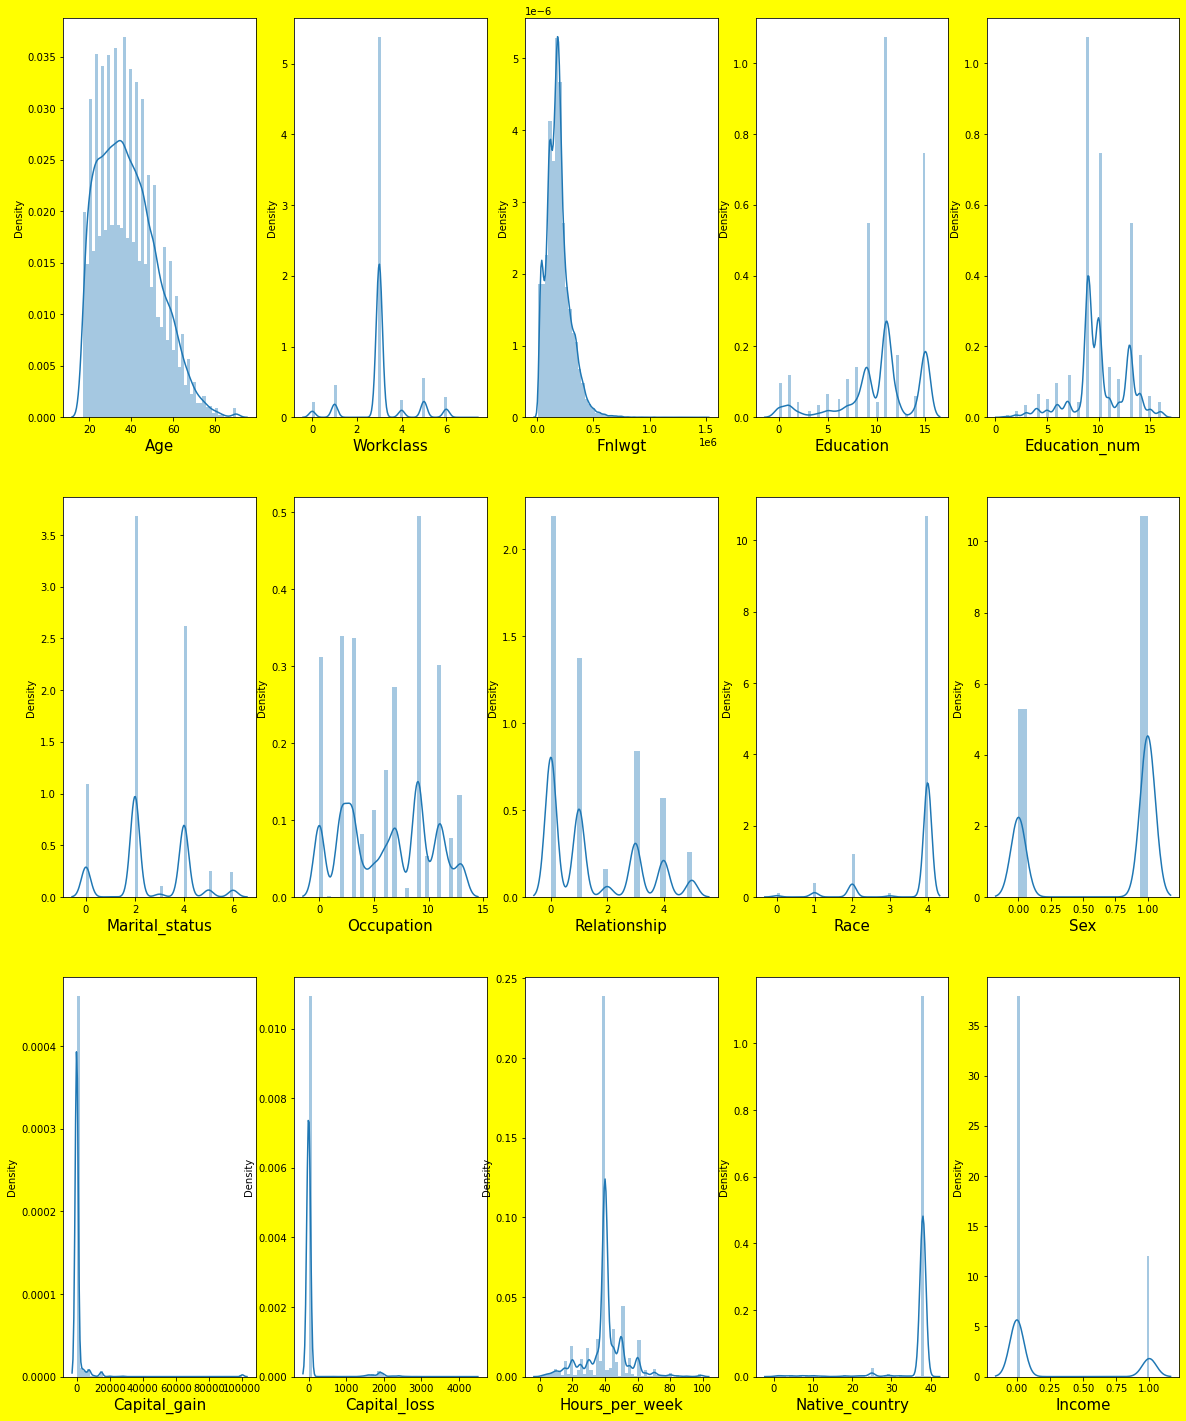

In [48]:
plt.figure(figsize=(20,25),facecolor='Yellow')
pltno=1

for c in df:
    if pltno<=15:
        ax=plt.subplot(3,5,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [49]:
# there is definitely skewness present in the dataset as of now.

<AxesSubplot:>

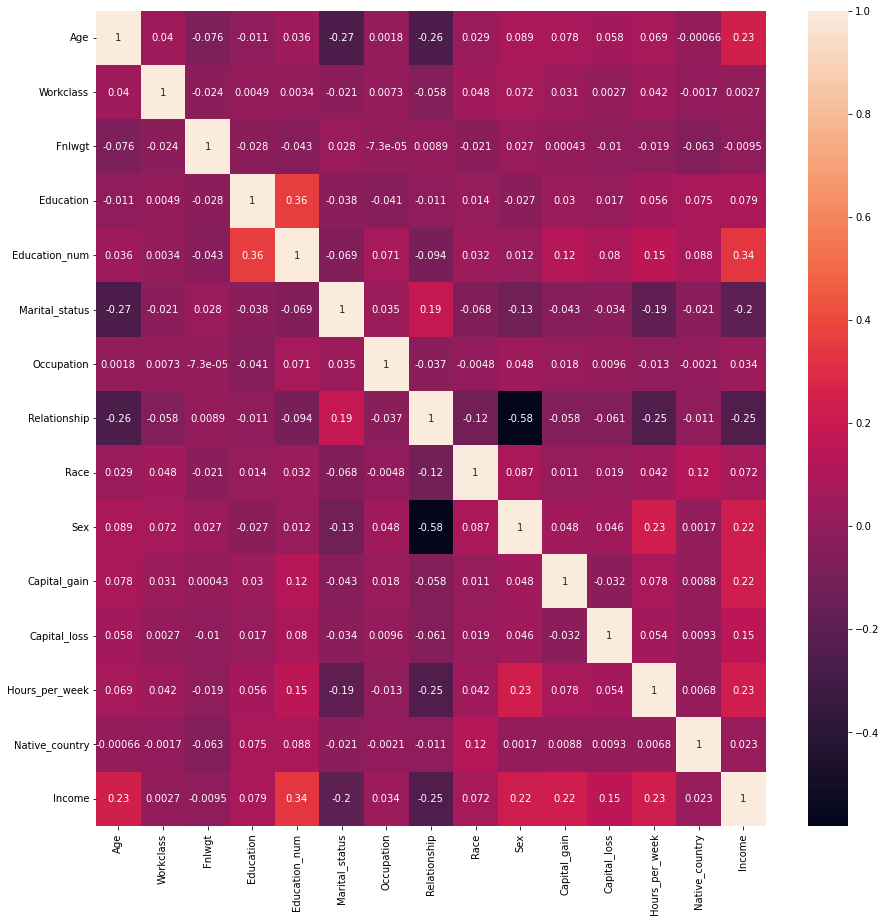

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [51]:
# let's look for the outliers.

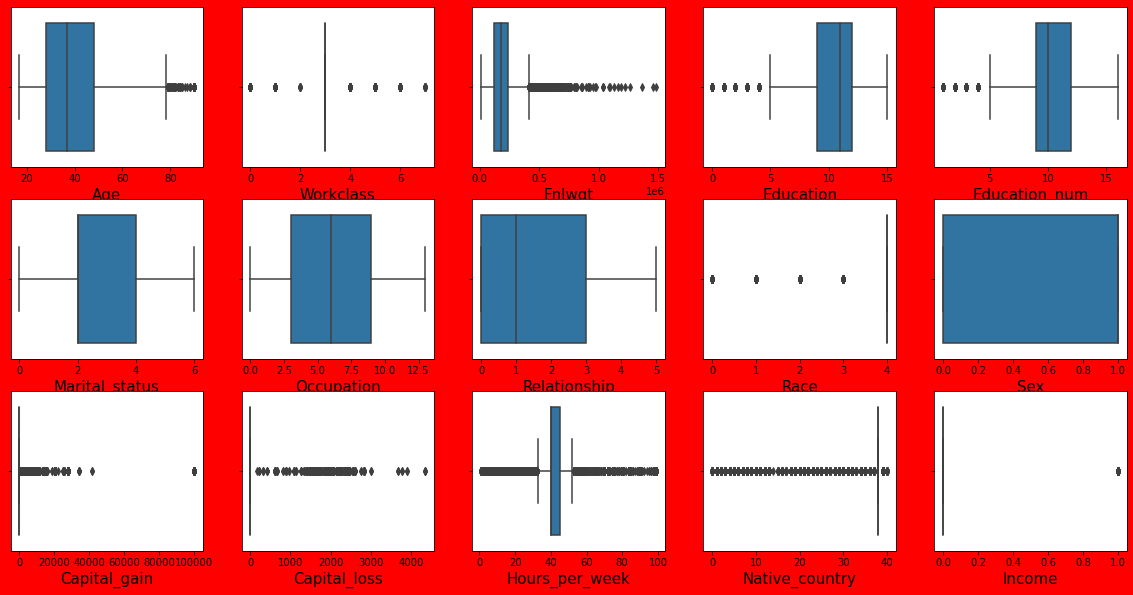

In [52]:
plt.figure(figsize=(20,10),facecolor='r')
pn=1
for c in df:
    if pn<=15:
        ax=plt.subplot(3,5,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

In [53]:
# There are outliers present.

In [54]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(32536, 15)

In [55]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [56]:
 df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0


In [57]:
df1.shape

(27751, 15)

In [58]:
df.shape

(32536, 15)

In [59]:
# data loss

(32536-27751)/32536*100

14.706786328989427

 the dataloss is  14.7% which is bigger than we expected, but since the dataset is big(it has 27751 rows and 15 columns left after removing outliers), we can afford to have 14.7% of dataloss.

In [60]:
df1.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
Income             1.322128
dtype: float64

In [61]:
# there is still skewness present in the dataset.
# the columns 'Native_country' and 'Sex' had categorical data so there can not be done anything  to remove  their skewness.

In [62]:
# let's seperate the features and label.

In [63]:
x=df1.drop(columns=['Income'])
y=df1['Income']

In [64]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0


In [65]:
x.skew()

Age                0.484822
Workclass          0.081802
Fnlwgt             0.629037
Education         -0.955723
Education_num     -0.145695
Marital_status    -0.045059
Occupation         0.013496
Relationship       0.753378
Race              -2.587054
Sex               -0.688876
Capital_gain       4.928795
Capital_loss      29.504415
Hours_per_week    -0.358726
Native_country    -5.411057
dtype: float64

In [66]:
x['Capital_gain'].value_counts()

0        25499
15024      313
7688       261
7298       228
5178        91
         ...  
6097         1
1455         1
2538         1
22040        1
5060         1
Name: Capital_gain, Length: 111, dtype: int64

In [67]:
x['Capital_loss'].value_counts()

0       27706
625        12
880         6
1092        5
1258        4
653         3
213         3
323         3
1138        2
810         2
974         2
419         2
155         1
Name: Capital_loss, dtype: int64

In [68]:
# both 'Capital_gain' and 'Capital_loss' columns have majority of data present in the '0'.

In [70]:
x.shape

(27751, 14)

In [76]:
print('"data present in "0" in column "Capital_gain""',(25499/27751)*100,'%')
print('-------------------------------------------------')
print('"data present in "0" in column "Capital_loss""',(27706/27751)*100,'%')


"data present in "0" in column "Capital_gain"" 91.88497711794169 %
-------------------------------------------------
"data present in "0" in column "Capital_loss"" 99.83784368130878 %


In [77]:
# it is better to remove these columns.

In [78]:
x=x.drop(columns=['Capital_gain','Capital_loss'])

In [79]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,40,38.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,40,38.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,16,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,20,38.0


In [80]:
x.skew()

Age               0.484822
Workclass         0.081802
Fnlwgt            0.629037
Education        -0.955723
Education_num    -0.145695
Marital_status   -0.045059
Occupation        0.013496
Relationship      0.753378
Race             -2.587054
Sex              -0.688876
Hours_per_week   -0.358726
Native_country   -5.411057
dtype: float64

In [82]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27751, dtype: int32

In [81]:
 # Now we will standardise the data.

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[ 0.8841087 ,  1.73868478, -1.08765708, ...,  0.71323102,
        -2.41639486,  0.18825728],
       [-0.01174249, -0.07717964,  0.31020027, ...,  0.71323102,
         0.00623378,  0.18825728],
       [ 1.1080715 , -0.07717964,  0.51168989, ...,  0.71323102,
         0.00623378,  0.18825728],
       ...,
       [ 1.48134283, -0.07717964, -0.36304442, ..., -1.40207026,
         0.00623378,  0.18825728],
       [-1.20621075, -0.07717964,  0.16067015, ...,  0.71323102,
        -1.78830596,  0.18825728],
       [ 1.03341723,  0.83075257,  1.07370597, ..., -1.40207026,
         0.00623378,  0.18825728]])

In [84]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [85]:
xx

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.884109,1.738685,-1.087657,-0.344860,1.212364,-0.404580,-0.776933,-0.914099,0.344865,0.713231,-2.416395,0.188257
1,-0.011742,-0.077180,0.310200,0.171277,-0.440797,-1.721355,-0.276482,-0.291332,0.344865,0.713231,0.006234,0.188257
2,1.108072,-0.077180,0.511690,-2.409407,-1.267378,-0.404580,-0.276482,-0.914099,-2.958105,0.713231,0.006234,0.188257
3,-0.086397,-0.077180,1.038373,0.429345,1.625655,-0.404580,-0.776933,2.199735,0.344865,-1.402070,0.006234,0.188257
4,0.809454,-0.077180,-0.275614,-1.119065,-2.093959,0.253808,0.223968,-0.291332,-2.958105,-1.402070,-2.147214,-6.377546
...,...,...,...,...,...,...,...,...,...,...,...,...
27746,-0.832939,-0.077180,0.750213,-0.860997,0.799074,-0.404580,1.475095,2.199735,0.344865,-1.402070,-0.173220,0.188257
27747,0.137566,-0.077180,-0.337017,0.171277,-0.440797,-0.404580,-0.026257,-0.914099,0.344865,0.713231,0.006234,0.188257
27748,1.481343,-0.077180,-0.363044,0.171277,-0.440797,2.228971,-1.527609,1.576968,0.344865,-1.402070,0.006234,0.188257
27749,-1.206211,-0.077180,0.160670,0.171277,-0.440797,0.912196,-1.527609,0.954201,0.344865,0.713231,-1.788306,0.188257


In [86]:
# now we will check the vif values

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [88]:
vif

,Vif values,features
0,1.169760,Age
1,1.009673,Workclass
2,1.029709,Fnlwgt
3,1.147406,Education
4,1.205012,Education_num
5,1.140286,Marital_status
6,1.017166,Occupation
7,1.676679,Relationship
8,1.048578,Race
9,1.551901,Sex


In [89]:
# The VIF values of all the features are  under 10.

In [90]:
y.value_counts()

0    21527
1     6224
Name: Income, dtype: int64

In [91]:
# our target variable is imbalanced, so we will balance it out.

In [92]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=44)
train_x,train_y=smt.fit_resample(xx,y)
train_y.value_counts()

0    21527
1    21527
Name: Income, dtype: int64

In [93]:
df_new=pd.DataFrame(data=train_x)
df_new['Income']=train_y
ndf=df_new
ndf

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.884109,1.738685,-1.087657,-0.344860,1.212364,-0.404580,-0.776933,-0.914099,0.344865,0.713231,-2.416395,0.188257,0
1,-0.011742,-0.077180,0.310200,0.171277,-0.440797,-1.721355,-0.276482,-0.291332,0.344865,0.713231,0.006234,0.188257,0
2,1.108072,-0.077180,0.511690,-2.409407,-1.267378,-0.404580,-0.276482,-0.914099,-2.958105,0.713231,0.006234,0.188257,0
3,-0.086397,-0.077180,1.038373,0.429345,1.625655,-0.404580,-0.776933,2.199735,0.344865,-1.402070,0.006234,0.188257,0
4,0.809454,-0.077180,-0.275614,-1.119065,-2.093959,0.253808,0.223968,-0.291332,-2.958105,-1.402070,-2.147214,-6.377546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43049,-0.516869,-0.077180,0.161202,-0.344860,1.212364,-0.404580,0.724419,-0.914099,0.344865,0.713231,-0.165640,0.188257,1
43050,0.670338,-0.077180,1.463810,-0.602928,0.385783,-0.404580,-0.924799,-0.914099,0.344865,0.713231,0.006234,0.188257,1
43051,-0.184667,-1.893044,0.118101,1.203550,-0.027507,-0.404580,0.974645,-0.914099,0.344865,0.713231,1.645130,0.188257,1
43052,1.307299,-0.077180,-1.125770,0.171277,-0.440797,-0.404580,-0.776933,-0.914099,0.344865,0.713231,0.006234,0.188257,1


In [94]:
x=ndf.drop(columns=['Income'])
y=ndf['Income']

In [95]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.884109,1.738685,-1.087657,-0.344860,1.212364,-0.404580,-0.776933,-0.914099,0.344865,0.713231,-2.416395,0.188257
1,-0.011742,-0.077180,0.310200,0.171277,-0.440797,-1.721355,-0.276482,-0.291332,0.344865,0.713231,0.006234,0.188257
2,1.108072,-0.077180,0.511690,-2.409407,-1.267378,-0.404580,-0.276482,-0.914099,-2.958105,0.713231,0.006234,0.188257
3,-0.086397,-0.077180,1.038373,0.429345,1.625655,-0.404580,-0.776933,2.199735,0.344865,-1.402070,0.006234,0.188257
4,0.809454,-0.077180,-0.275614,-1.119065,-2.093959,0.253808,0.223968,-0.291332,-2.958105,-1.402070,-2.147214,-6.377546
...,...,...,...,...,...,...,...,...,...,...,...,...
43049,-0.516869,-0.077180,0.161202,-0.344860,1.212364,-0.404580,0.724419,-0.914099,0.344865,0.713231,-0.165640,0.188257
43050,0.670338,-0.077180,1.463810,-0.602928,0.385783,-0.404580,-0.924799,-0.914099,0.344865,0.713231,0.006234,0.188257
43051,-0.184667,-1.893044,0.118101,1.203550,-0.027507,-0.404580,0.974645,-0.914099,0.344865,0.713231,1.645130,0.188257
43052,1.307299,-0.077180,-1.125770,0.171277,-0.440797,-0.404580,-0.776933,-0.914099,0.344865,0.713231,0.006234,0.188257


In [96]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43049    1
43050    1
43051    1
43052    1
43053    1
Name: Income, Length: 43054, dtype: int32

0 implies '<=50k income' and 1 implies '>50k income' in target variable.

# Building Model

In [97]:
# Classification model will be build on this problem.

In [98]:
#importing necessary libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [99]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(10,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.7583612040133779 on random state 21


In [100]:
# thee model gives best accuracy at random state 21

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=21,test_size=.25)

# logistic Regression

In [102]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lpred=lr.predict(xtest)
print(accuracy_score(ytest,lpred))
print(confusion_matrix(ytest,lpred))
print(classification_report(ytest,lpred))

0.7583612040133779
[[3996 1409]
 [1192 4167]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5405
           1       0.75      0.78      0.76      5359

    accuracy                           0.76     10764
   macro avg       0.76      0.76      0.76     10764
weighted avg       0.76      0.76      0.76     10764



In [103]:
# 75.83% accuracy.

# RandonForest Classifier

In [104]:
rc=RandomForestClassifier()
rc.fit(xtrain,ytrain)
cpred=rc.predict(xtest)
print(accuracy_score(ytest,cpred))
print(confusion_matrix(ytest,cpred))
print(classification_report(ytest,cpred))

0.8928836863619473
[[4718  687]
 [ 466 4893]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5405
           1       0.88      0.91      0.89      5359

    accuracy                           0.89     10764
   macro avg       0.89      0.89      0.89     10764
weighted avg       0.89      0.89      0.89     10764



In [105]:
# 89.28% accuracy.

# SVC

In [106]:
svc=SVC()
svc.fit(xtrain,ytrain)
spred=svc.predict(xtest)
print(accuracy_score(ytest,spred))
print(confusion_matrix(ytest,spred))
print(classification_report(ytest,spred))

0.8276662950575994
[[4114 1291]
 [ 564 4795]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      5405
           1       0.79      0.89      0.84      5359

    accuracy                           0.83     10764
   macro avg       0.83      0.83      0.83     10764
weighted avg       0.83      0.83      0.83     10764



In [107]:
# 82.76% acuracy.

# DecisionTree Classifier

In [108]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dpred=dt.predict(xtest)
print(accuracy_score(ytest,dpred))
print(confusion_matrix(ytest,dpred))
print(classification_report(ytest,dpred))

0.8390932738758826
[[4537  868]
 [ 864 4495]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5405
           1       0.84      0.84      0.84      5359

    accuracy                           0.84     10764
   macro avg       0.84      0.84      0.84     10764
weighted avg       0.84      0.84      0.84     10764



In [109]:
# 83.90% accuracy.

# KNeighbors Classifier.

In [110]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(accuracy_score(ytest,kpred))
print(confusion_matrix(ytest,kpred))
print(classification_report(ytest,kpred))

0.8542363433667781
[[4164 1241]
 [ 328 5031]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      5405
           1       0.80      0.94      0.87      5359

    accuracy                           0.85     10764
   macro avg       0.86      0.85      0.85     10764
weighted avg       0.86      0.85      0.85     10764



In [111]:
# 85.42% accuracy.

# CrossValidation Score.

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
#for logistic regression

ls=cross_val_score(lr,x,y)
print(ls)
print(ls.mean())

[0.74277087 0.75926141 0.75031936 0.75055162 0.75191638]
0.7509639279149066


In [114]:
# for random forest classifier

rs=cross_val_score(rc,x,y)
print(rs)
print(rs.mean())

[0.81175241 0.87504355 0.91185693 0.92463129 0.92090592]
0.8888380189507222


In [115]:
# for svc

ss=cross_val_score(svc,x,y)
print(ss)
print(ss.mean())

[0.81581698 0.81674602 0.82441064 0.82522355 0.83031359]
0.8225021556982662


In [116]:
# for decisiontree classifier

ds=cross_val_score(dt,x,y)
print(ds)
print(ds.mean())

[0.73963535 0.82220416 0.86900476 0.87214029 0.87700348]
0.8359976077919944


In [117]:
# for kneighbors classifier

ks=cross_val_score(k,x,y)
print(ks)
print(ks.mean())


[0.83730113 0.84322378 0.85855301 0.86319823 0.86178862]
0.8528129552576444


In [118]:
# as per the observation, RandomForest classifier is our best model
# so hyperparameter tuning will be done on that model

# HyperParameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

In [121]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25,30],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=5,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2'}

In [122]:
fmodel=RandomForestClassifier(max_features='log2',criterion='gini',max_depth=30)

In [123]:
fmodel.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=30, max_features='log2')

In [124]:
pred=fmodel.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc*100)

89.39056112969156


In [125]:
#  the randomforest classifier gives the accuracy of 89.39%


In [126]:
# save the model

In [127]:
import joblib
joblib.dump(fmodel,'Census_income')

['Census_income']

In [128]:
#load the model

In [129]:
m = joblib.load("Census_income")
print(m.predict(xtest))

[1 1 1 ... 0 1 0]


In [130]:
d=pd.DataFrame({'predicted values':m.predict(xtest),'actual values':ytest})

In [132]:
d

,predicted values,actual values
34624,1,1
18217,1,1
24606,1,1
10510,1,0
4598,0,0
...,...,...
27942,1,1
8830,1,1
18346,0,0
6545,1,0


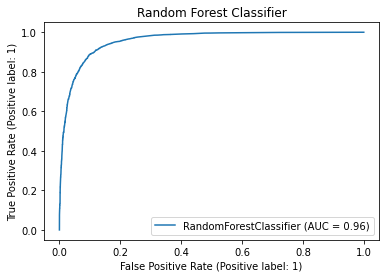

In [133]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(fmodel,xtest,ytest)
plt.title('Random Forest Classifier')
plt.show()
